# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter(action='ignore')

# **2. Loading the dataset**

In [3]:
breast_cancer_data = pd.read_csv('breast_cancer_data.csv')
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **3. Data Preprocessing**

In [4]:
print(breast_cancer_data.info())

# Checking for duplicate entries
duplicate_entries = breast_cancer_data.duplicated().sum()
print("Number of duplicate entries: ", duplicate_entries)

# Deleting the duplicate entries if any
if duplicate_entries > 0:
    print(f"Found {duplicate_entries} duplicate rows. Removing them...")
    breast_cancer_data = breast_cancer_data.drop_duplicates()

# Checking for missing values
print("Number of missing values: \n", breast_cancer_data.isnull().sum())

# Removing the 'Unnamed: 32' column as it contains only missing values
breast_cancer_data.drop(columns=['Unnamed: 32'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **4. Exploratory Data Analysis (EDA)**

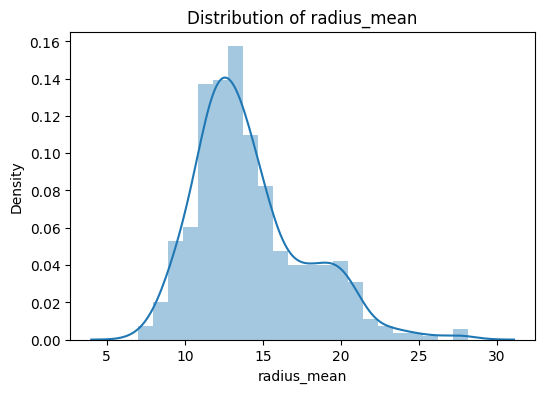

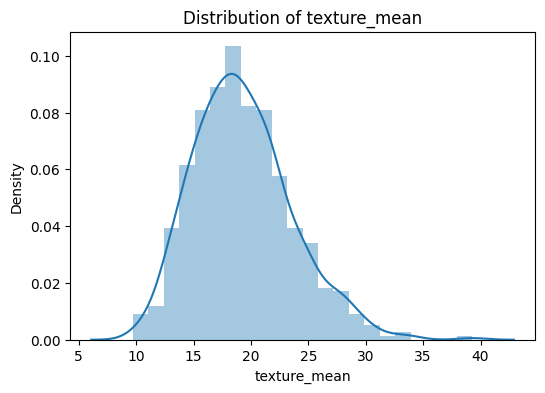

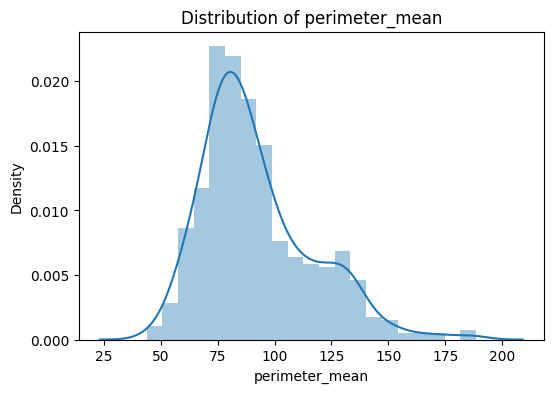

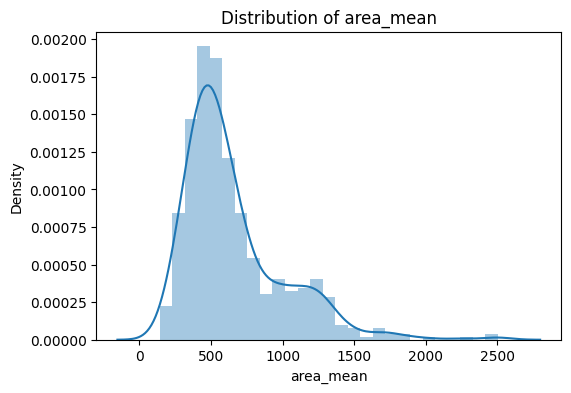

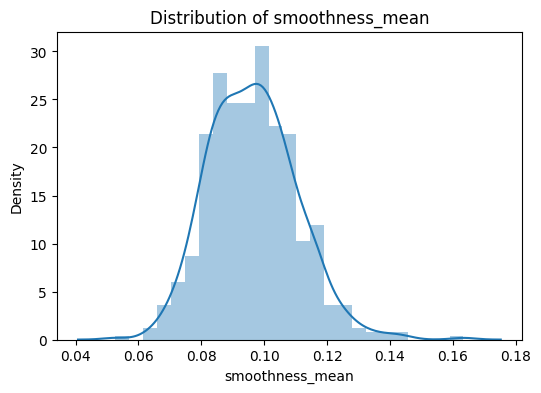

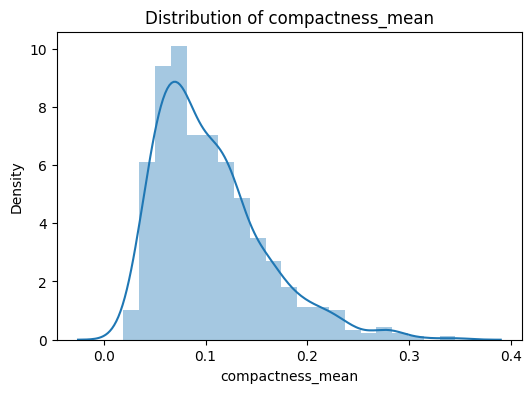

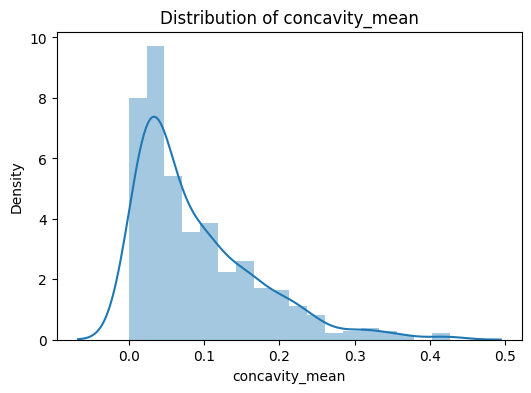

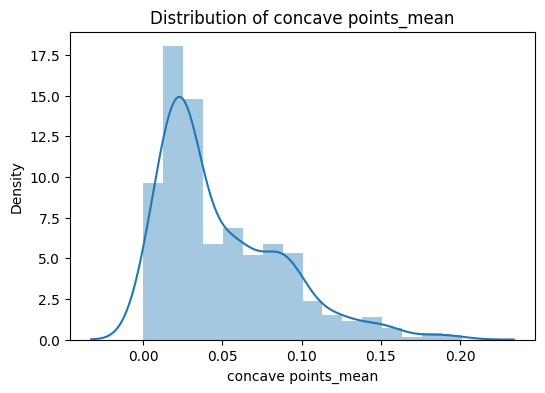

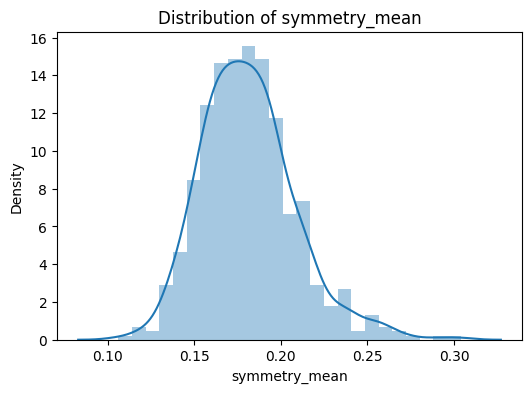

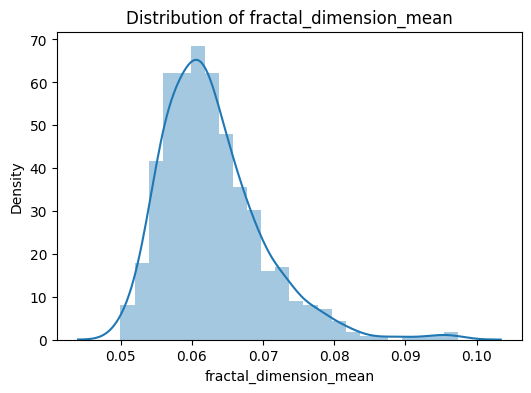

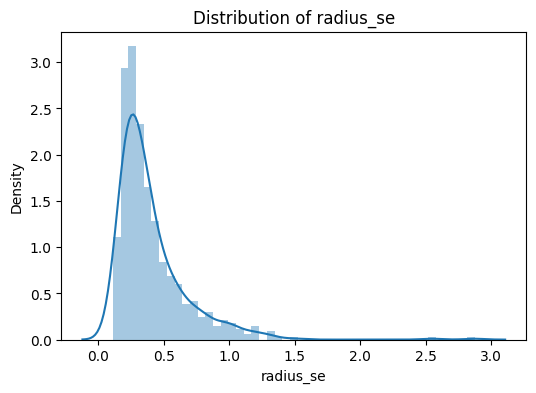

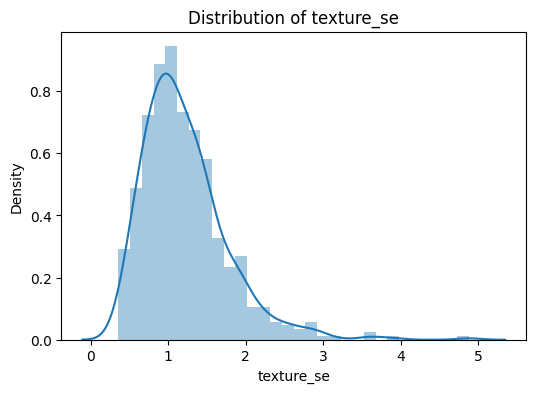

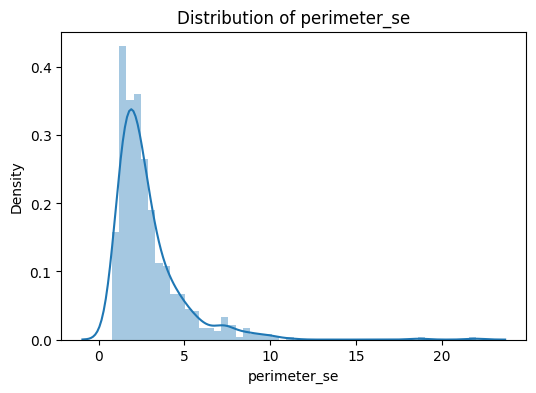

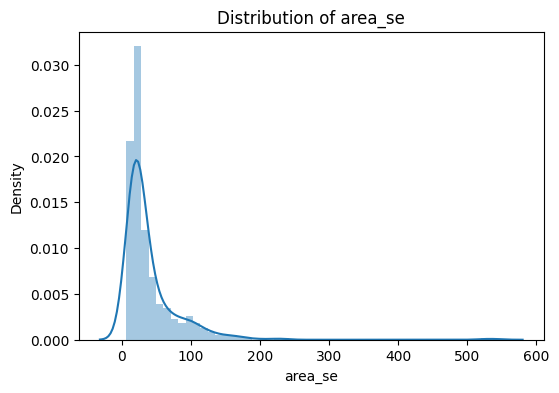

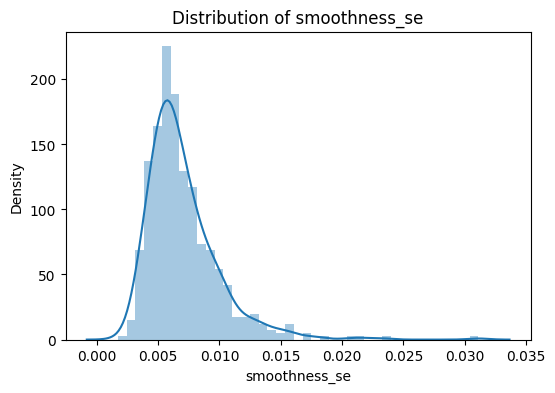

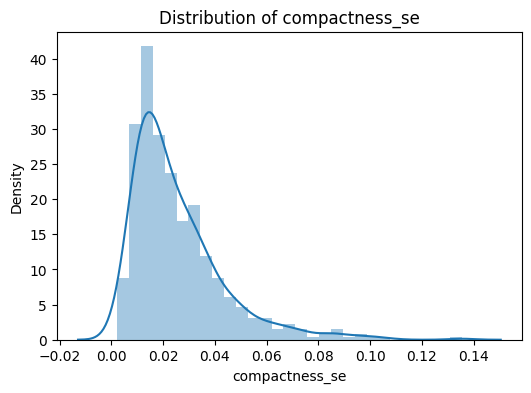

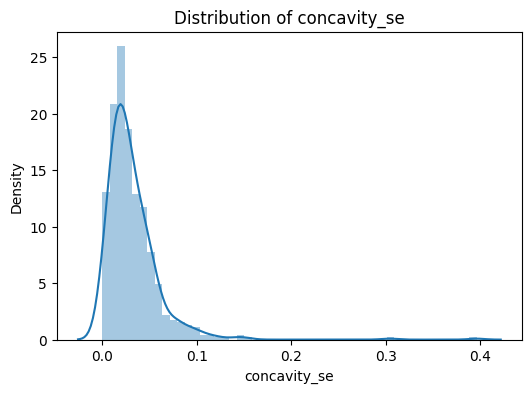

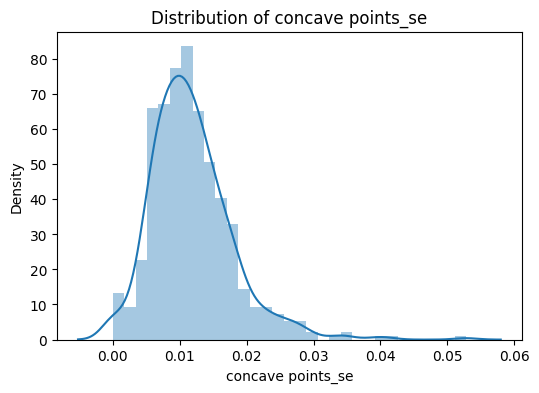

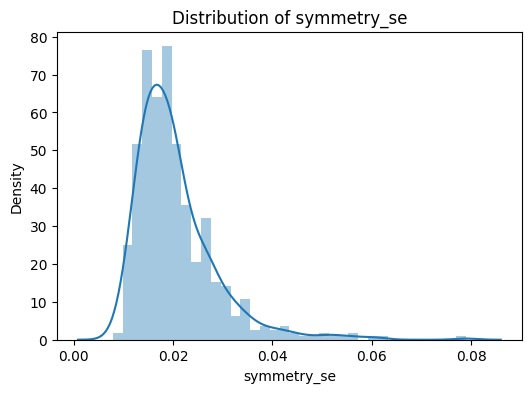

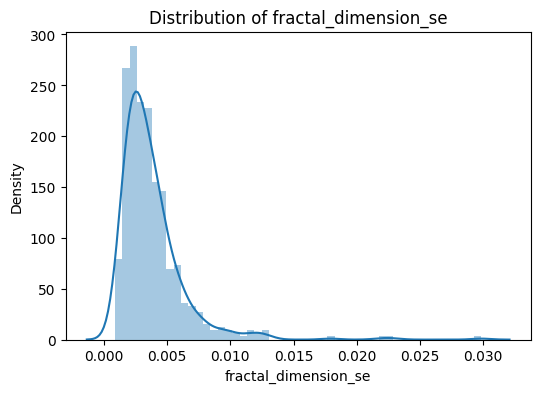

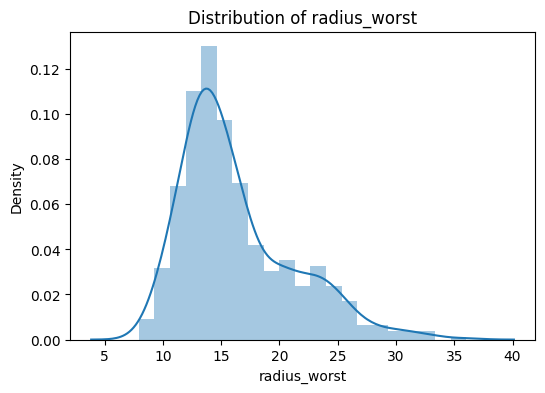

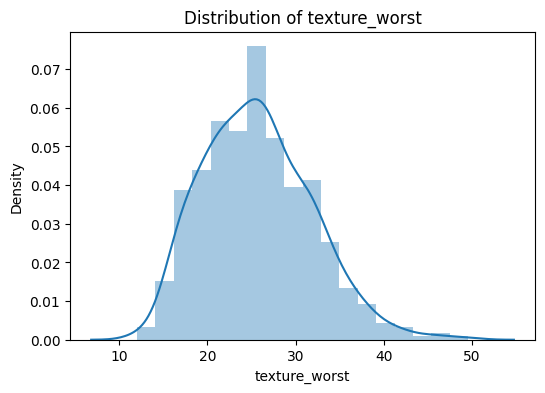

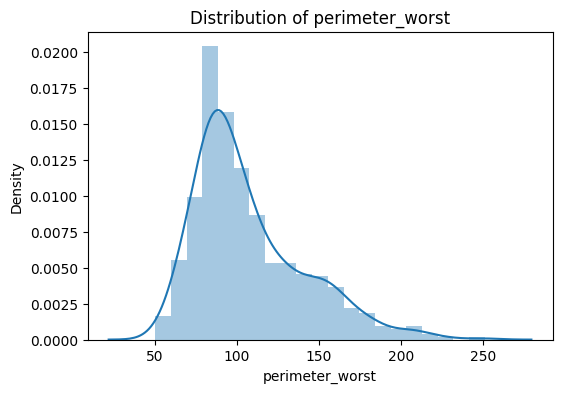

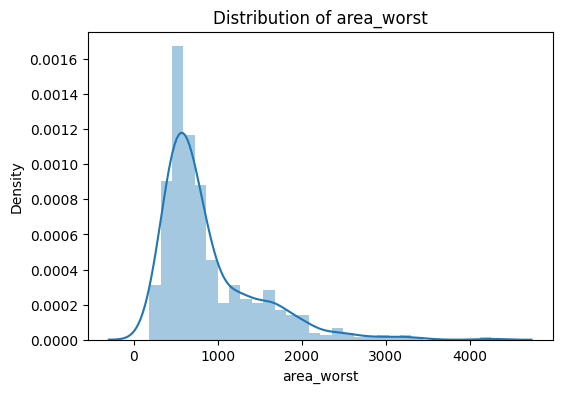

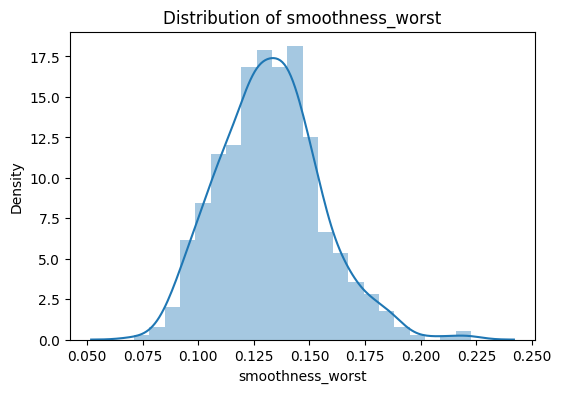

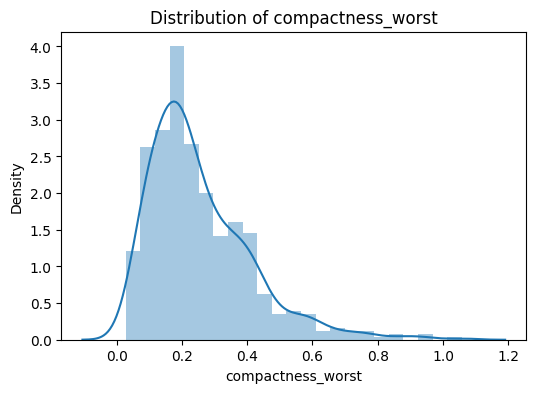

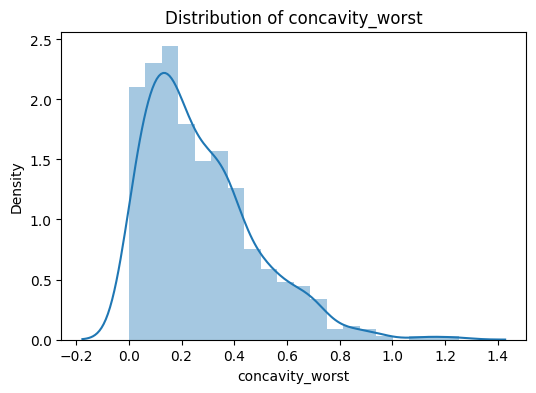

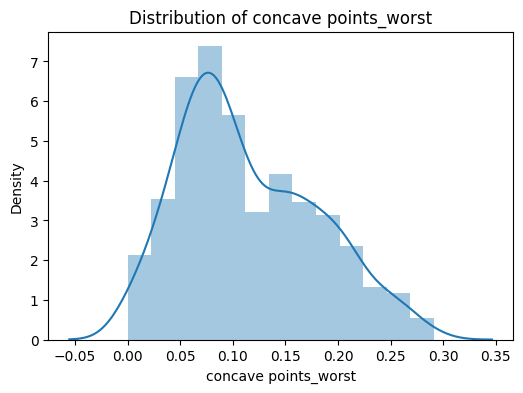

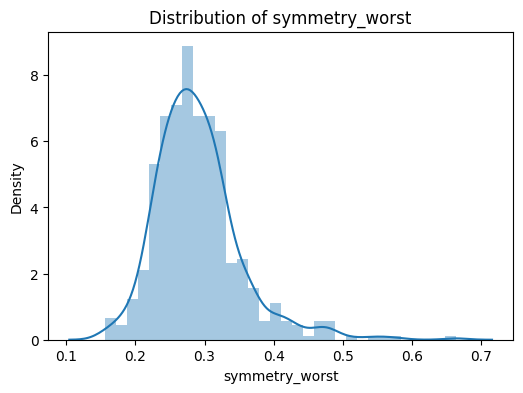

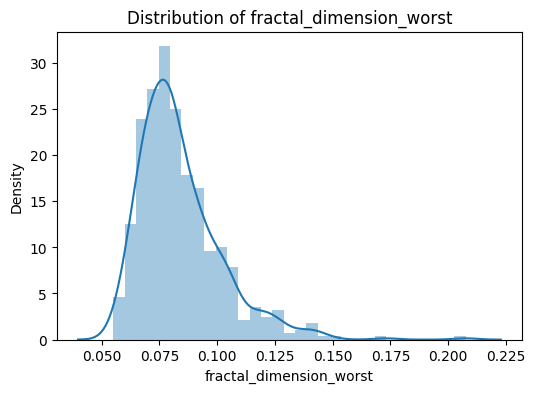

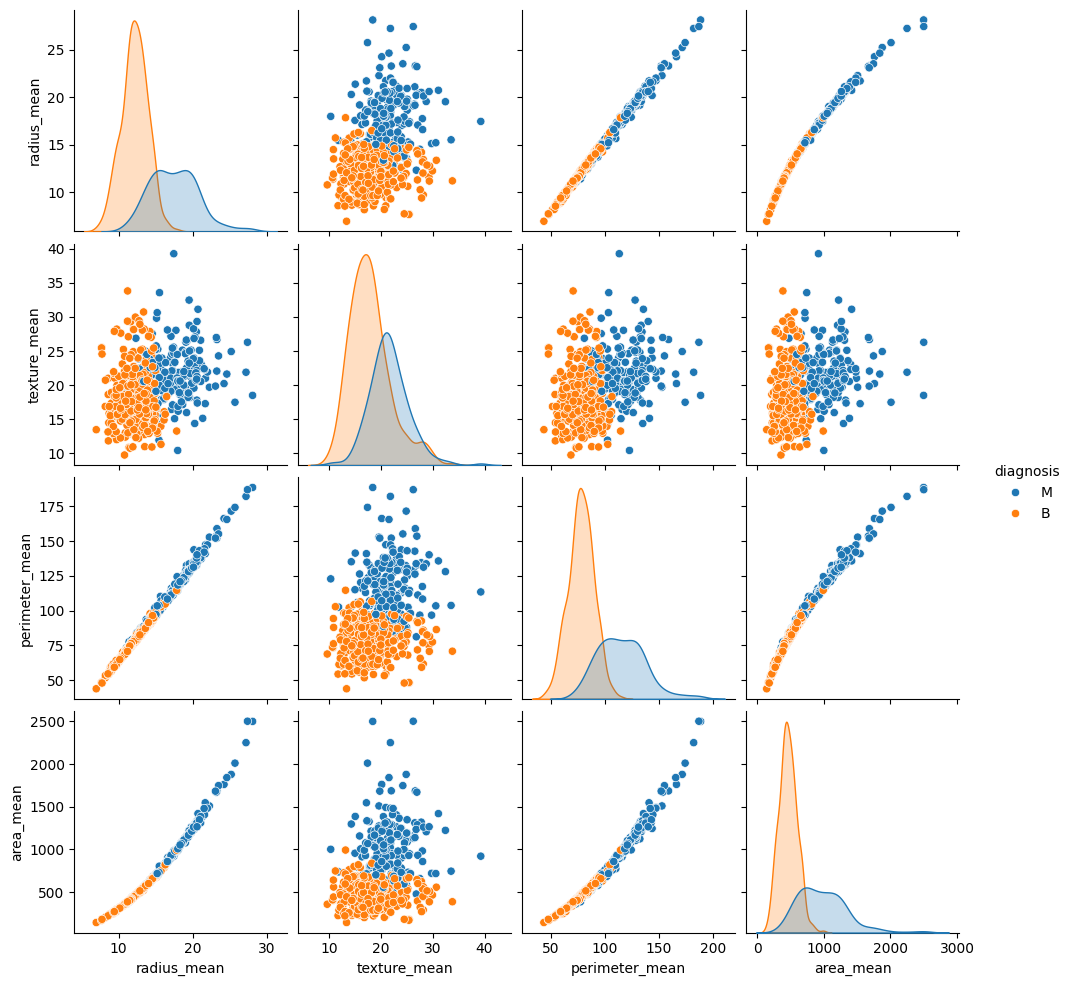

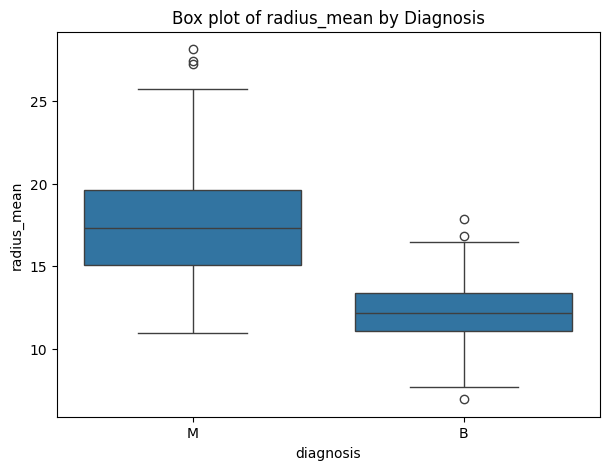

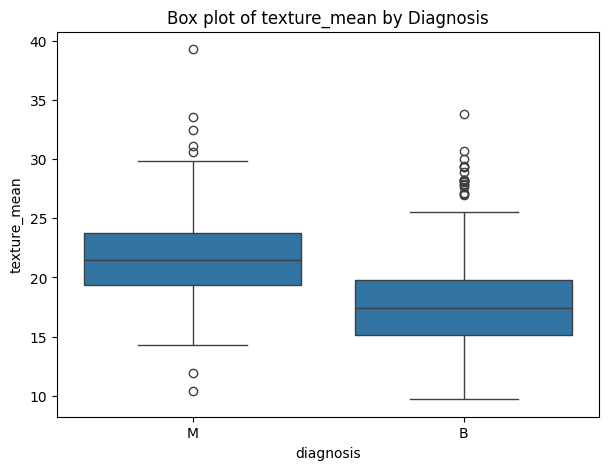

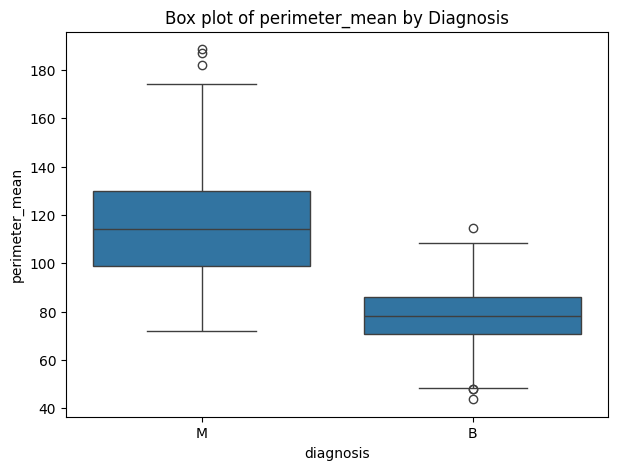

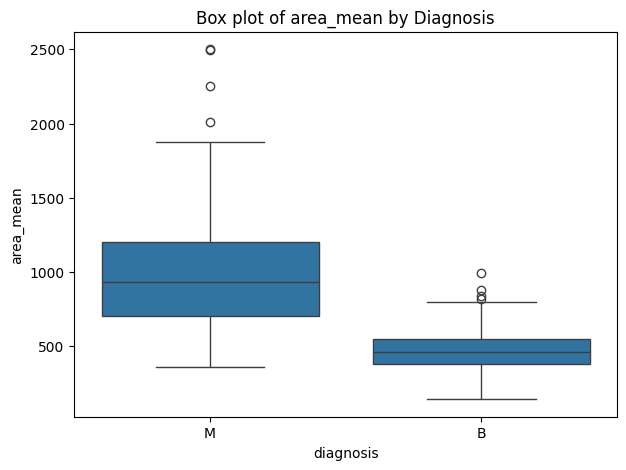

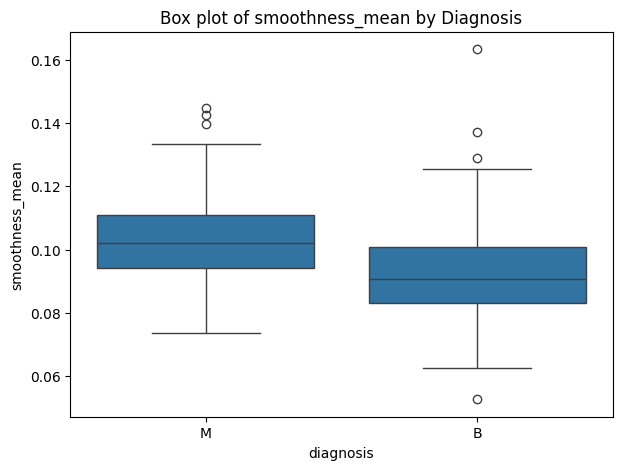

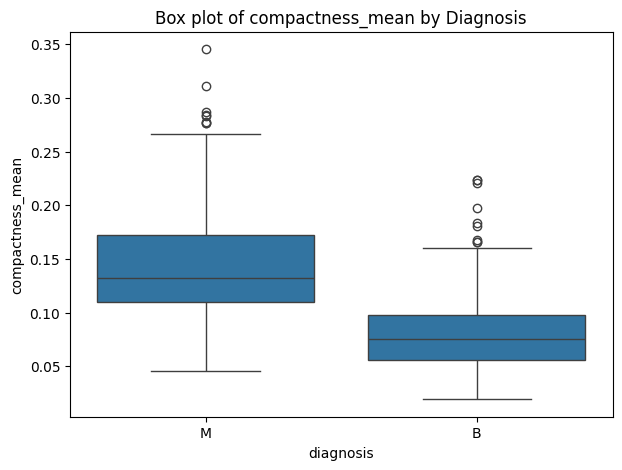

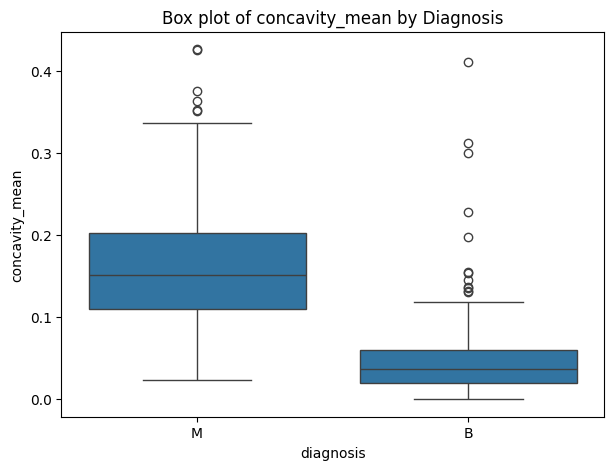

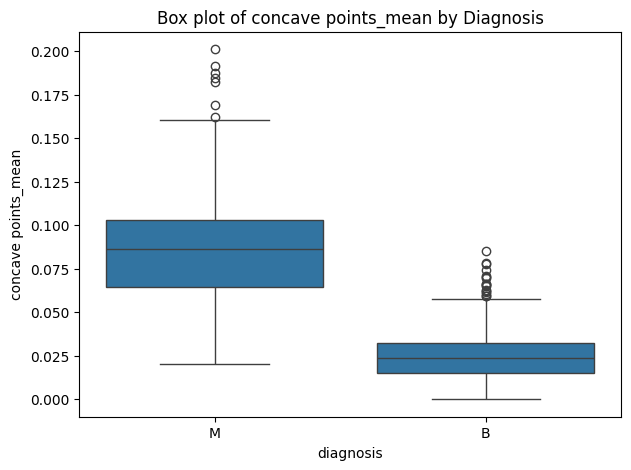

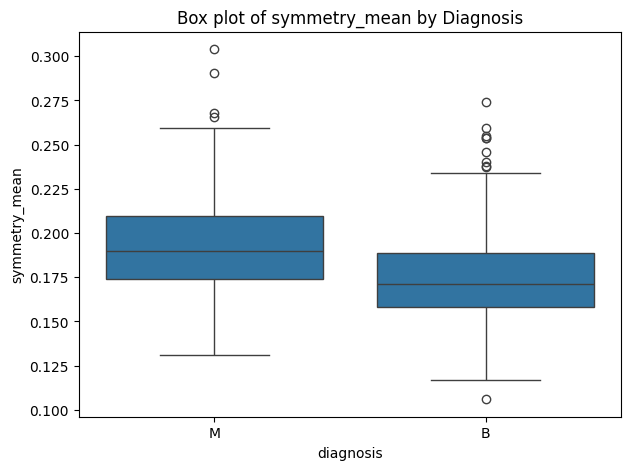

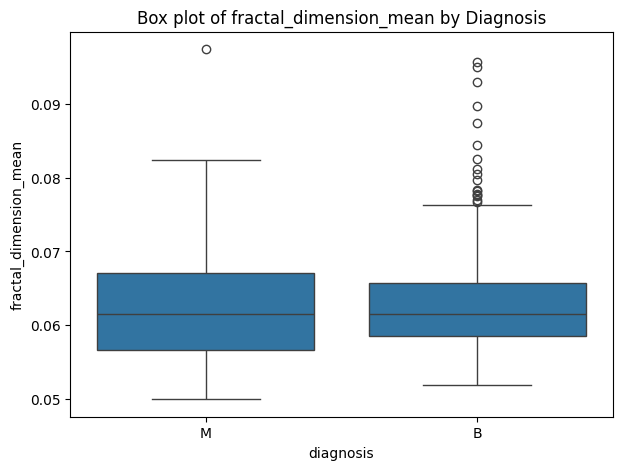

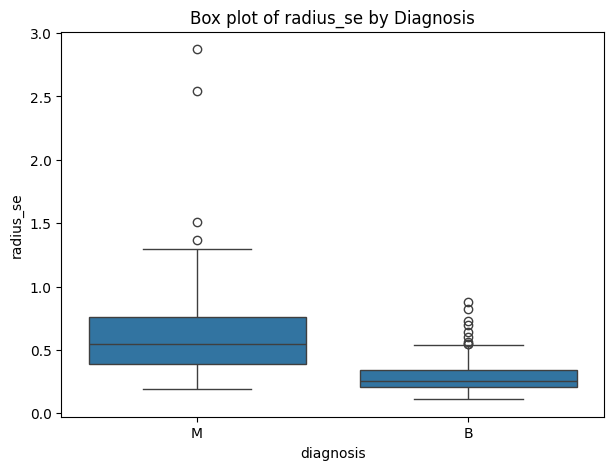

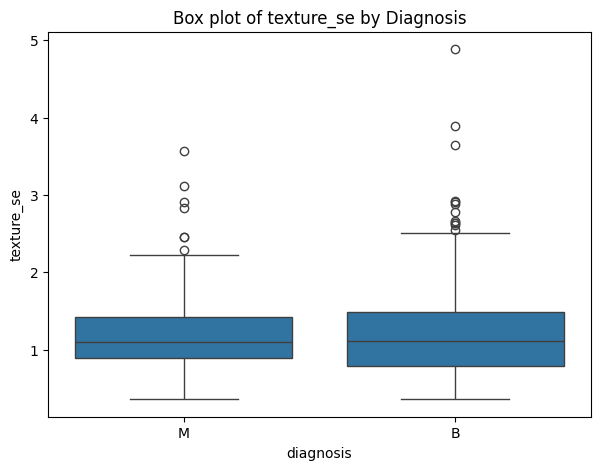

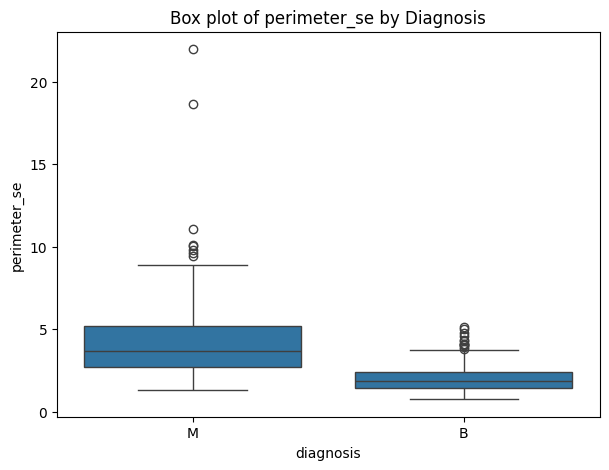

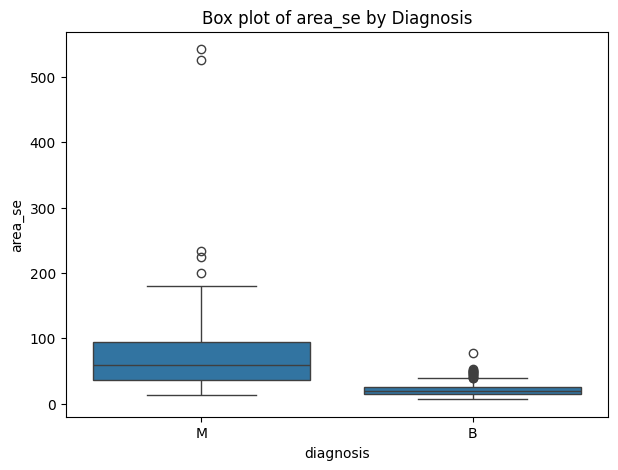

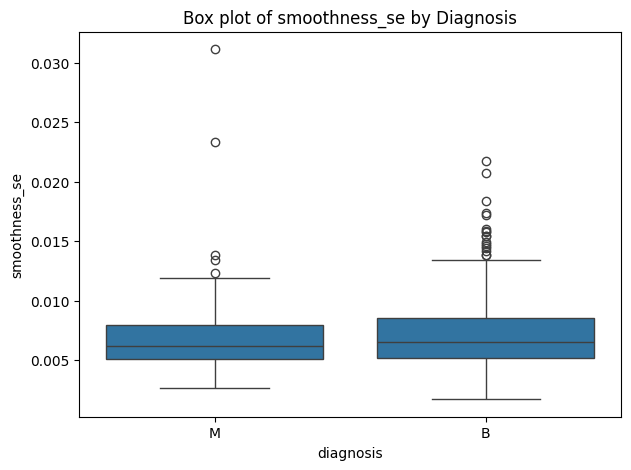

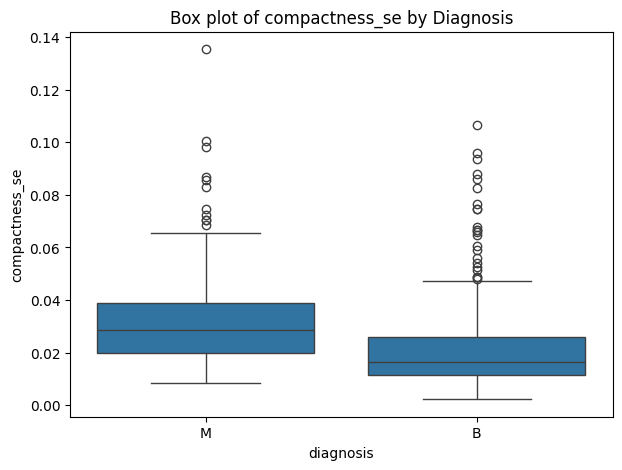

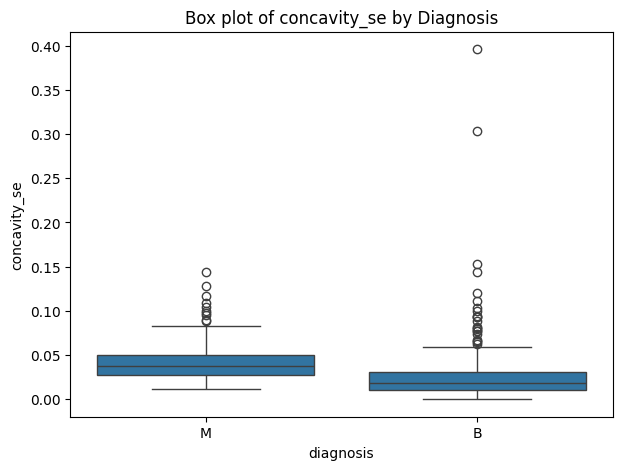

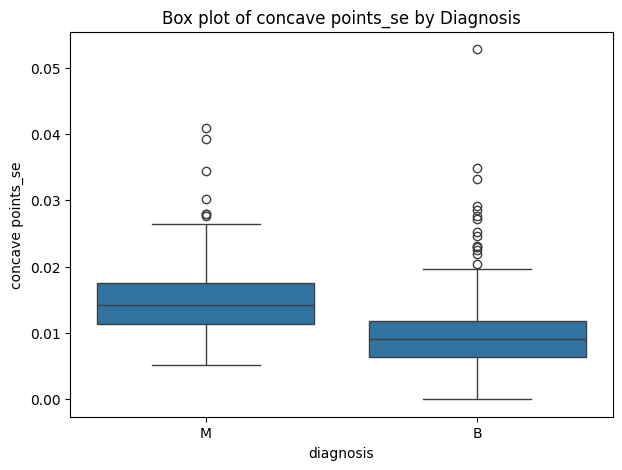

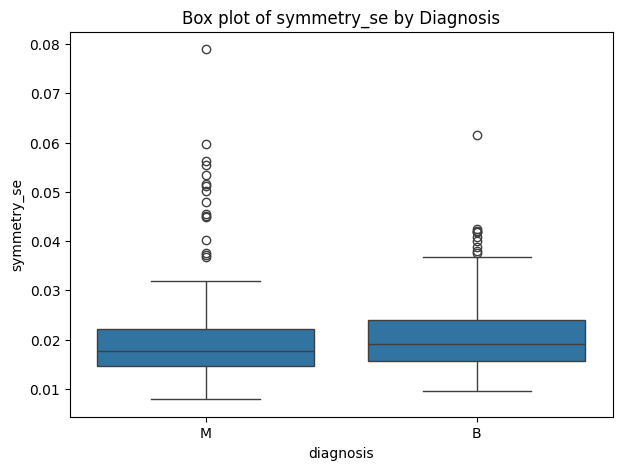

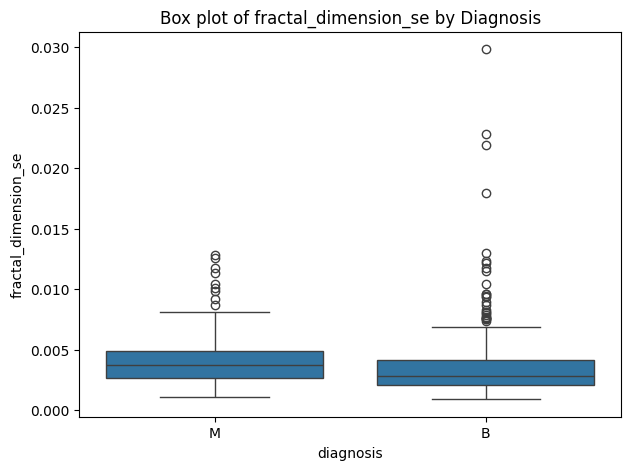

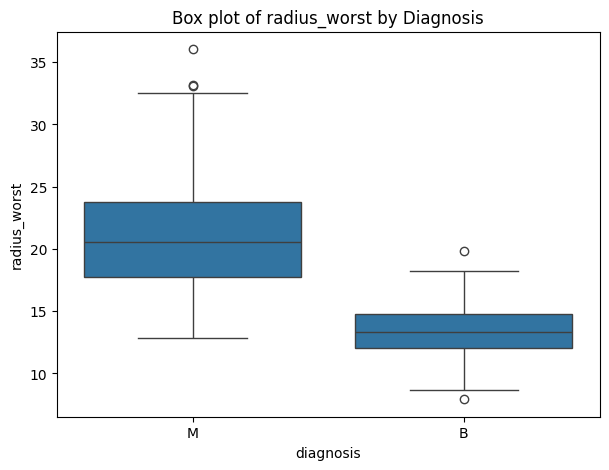

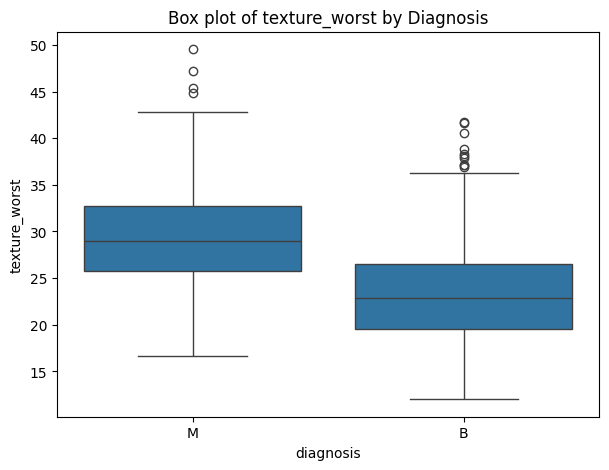

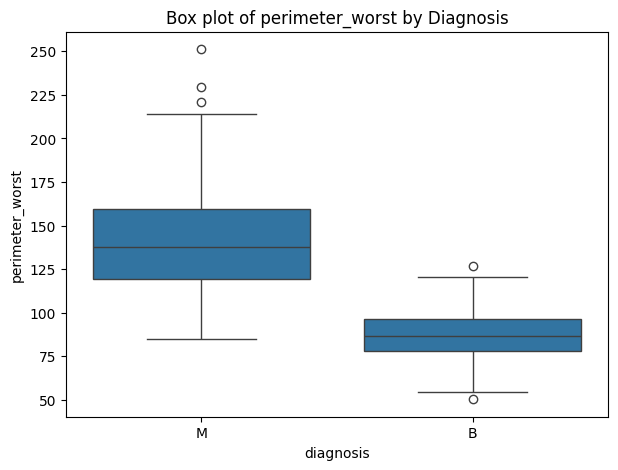

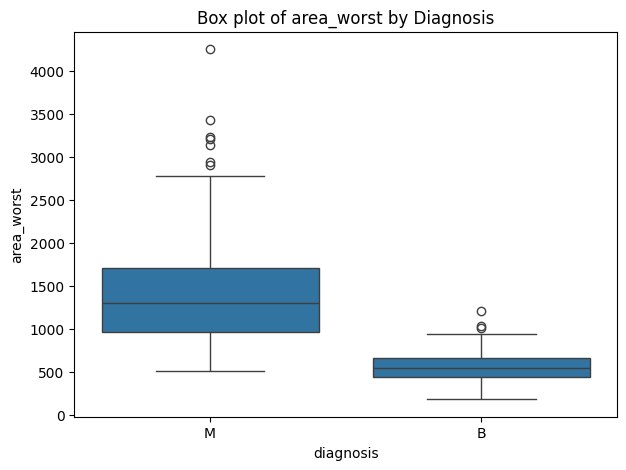

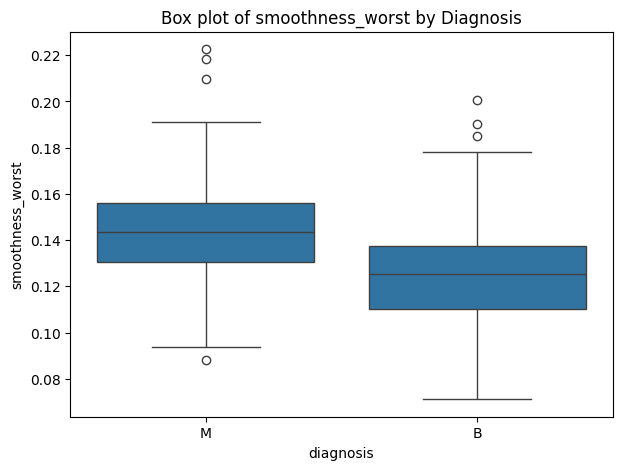

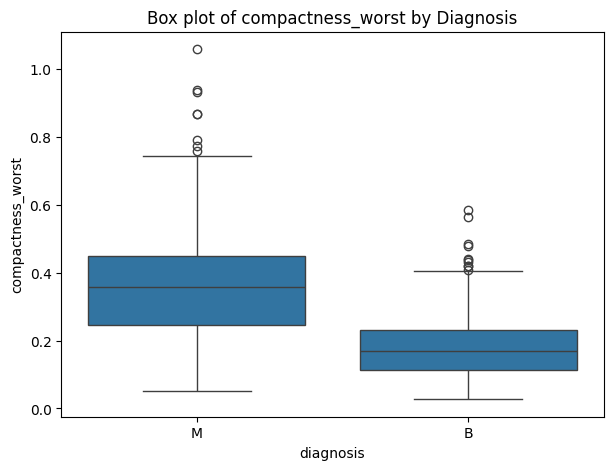

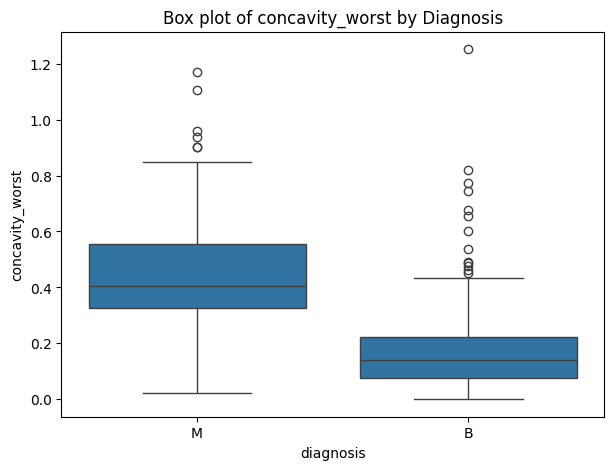

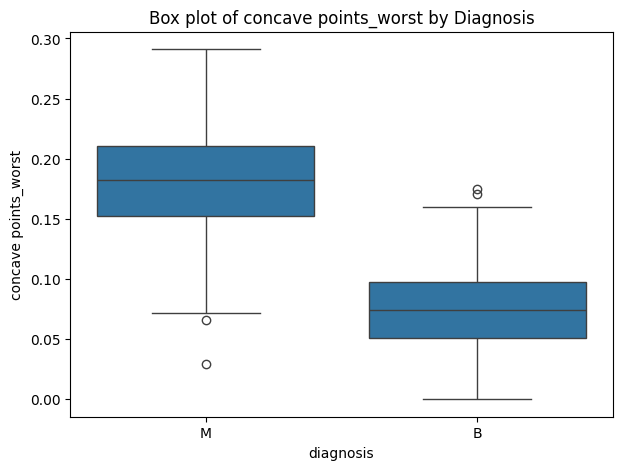

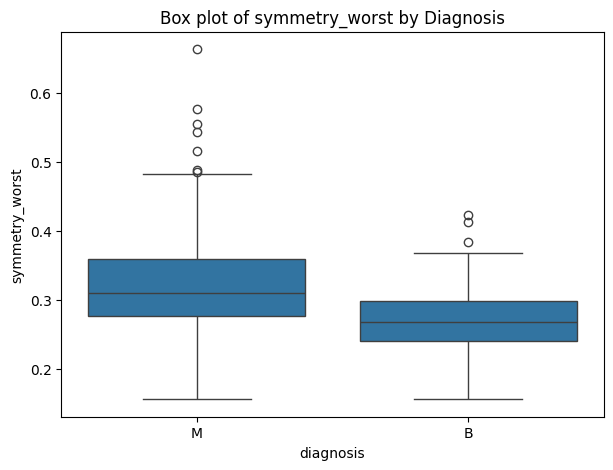

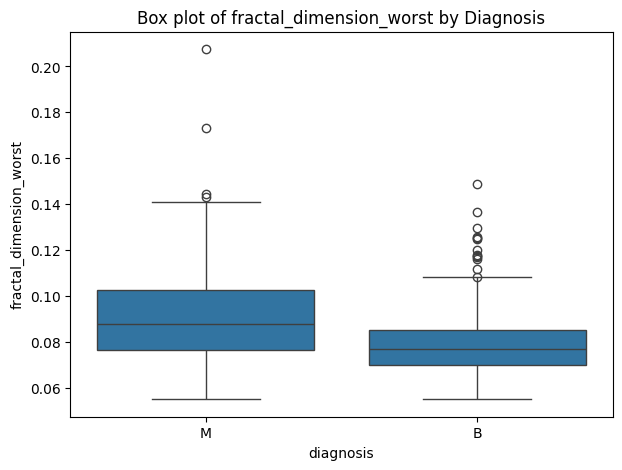

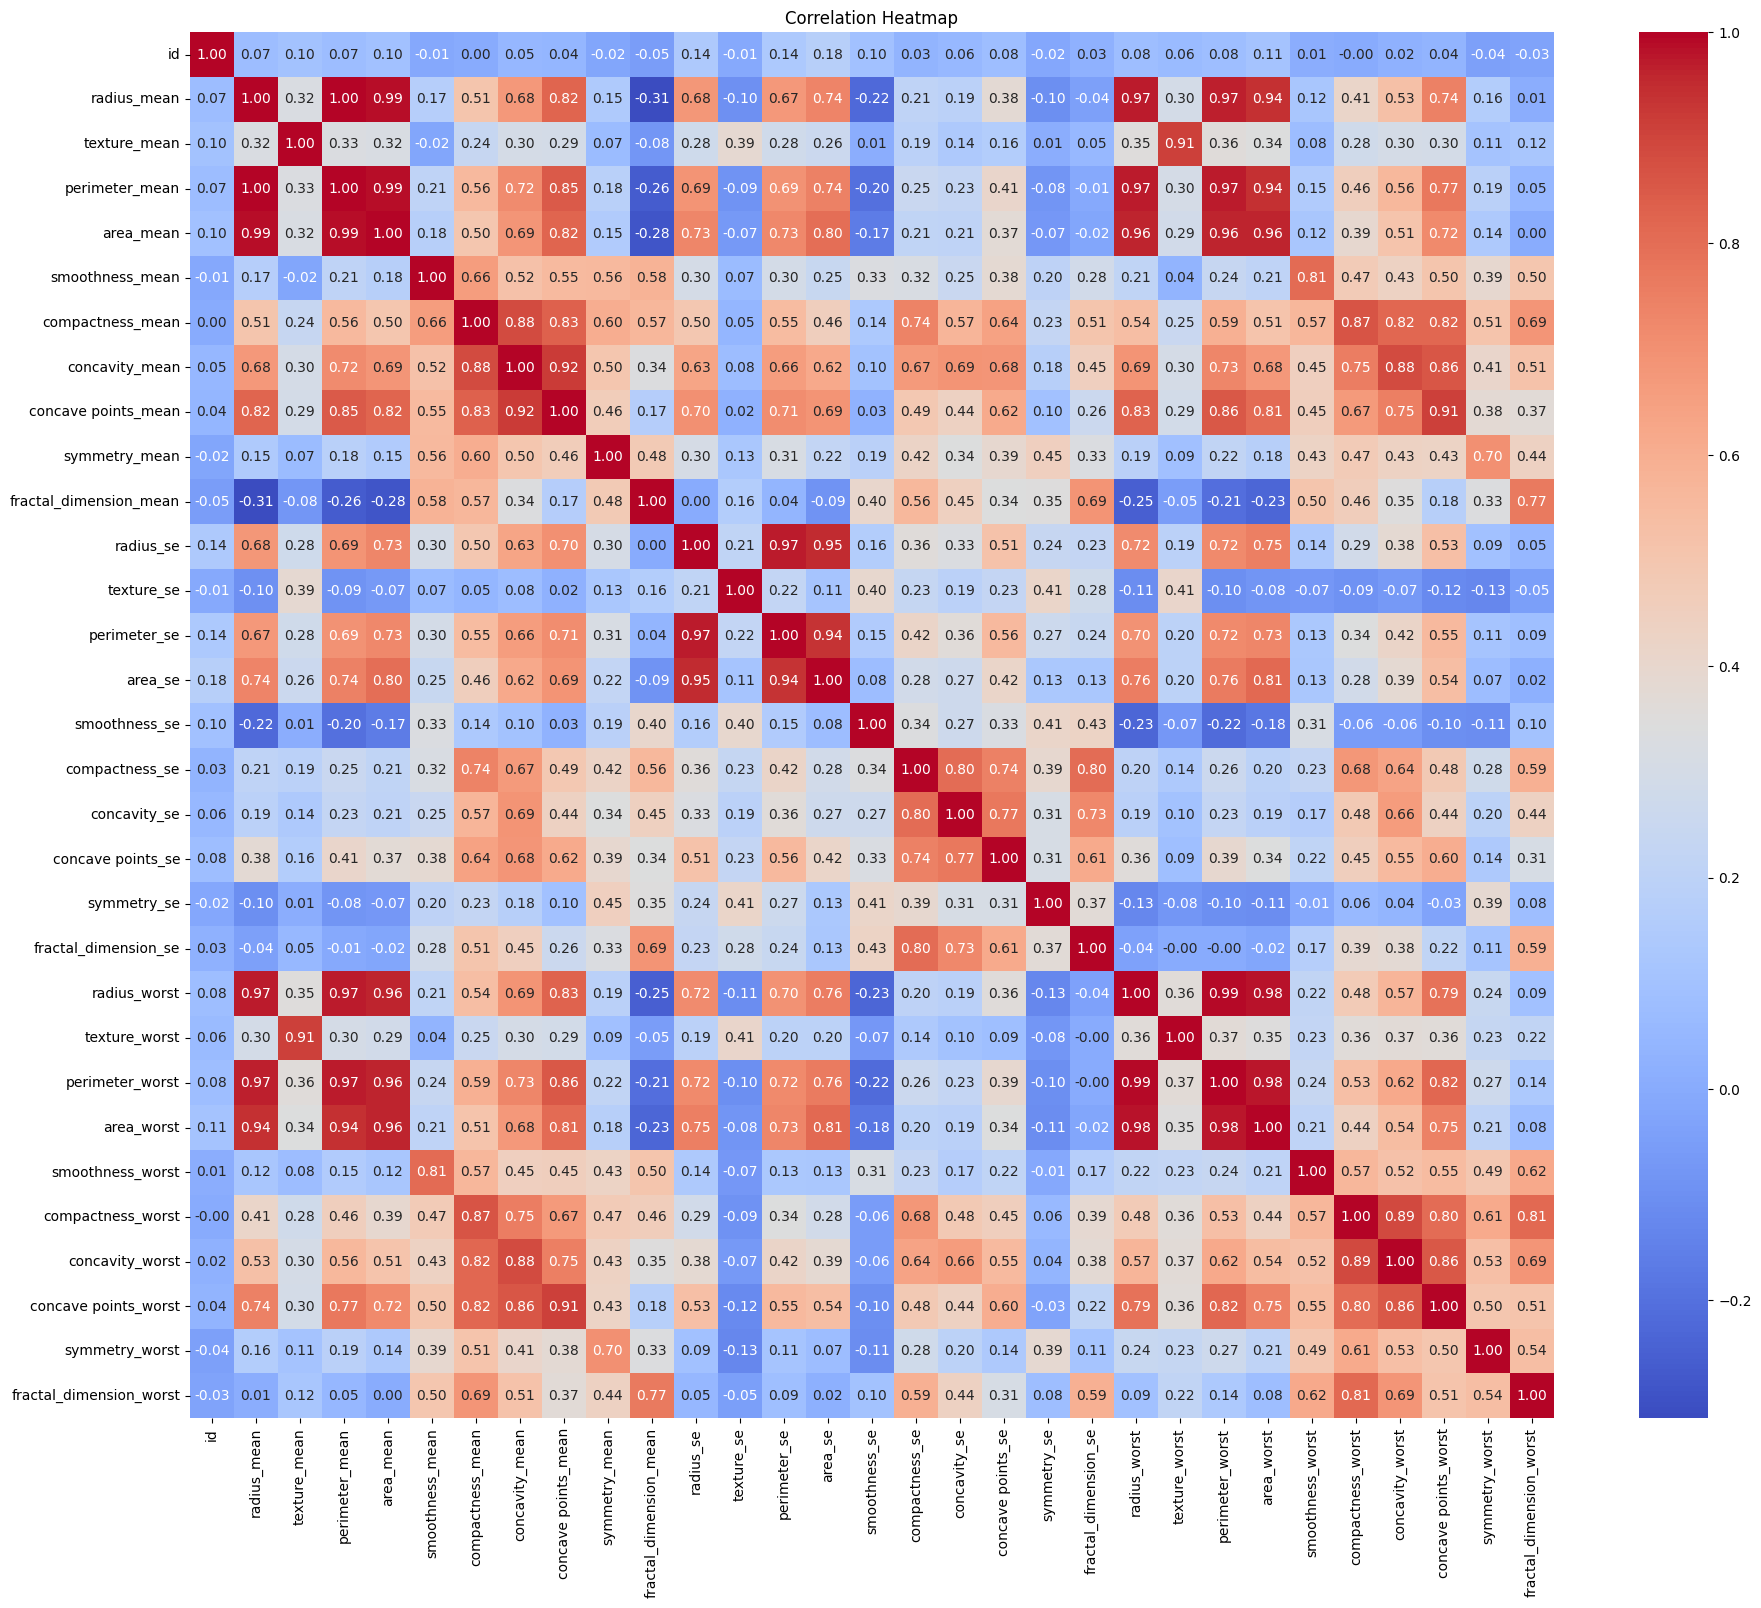

In [5]:
# Assessing normality and skewness
for col in breast_cancer_data.columns[2:]:  # Skipping 'id' and 'diagnosis' columns
    plt.figure(figsize=(6, 4))
    sns.distplot(breast_cancer_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Generating pair plots to inspect distribution patterns (using a subset of features for brevity)
sns.pairplot(data=breast_cancer_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()

# Constructing box plots for each variable
for col in breast_cancer_data.columns[2:]:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='diagnosis', y=col, data=breast_cancer_data)
    plt.title(f'Box plot of {col} by Diagnosis')
    plt.show()

# Examining the correlation between variables using a heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(breast_cancer_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Splitting the dataset into Training set and Test Set**

In [6]:
# Defining the feature matrix (X) and target variable (y)
X = breast_cancer_data.iloc[:, 2:].values  # Excluding 'id' and 'diagnosis' columns
y = breast_cancer_data['diagnosis'].values

# Encoding the categorical data
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)